In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read data
#to bypass columns with mixed dtypes error, set lowmemory to false
twenty_taxi = pd.read_csv("2020_Green_Taxi_Trip_Data.csv", low_memory=False) 
twenty_one_taxi = pd.read_csv("2021_Green_Taxi_Trip_Data.csv", low_memory=False) 

In [3]:
#show first 5 rows of our data
twenty_taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,12/18/2019 03:52:30 PM,12/18/2019 03:54:39 PM,N,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,NaN,0.3,4.81,1.0,1.0,0.00
1,2.0,01/01/2020 12:45:58 AM,01/01/2020 12:56:39 AM,N,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,NaN,0.3,24.36,1.0,2.0,0.00
2,2.0,01/01/2020 12:41:38 AM,01/01/2020 12:52:49 AM,N,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,NaN,0.3,15.34,1.0,1.0,0.00
3,1.0,01/01/2020 12:52:46 AM,01/01/2020 01:14:21 AM,N,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,NaN,0.3,25.05,2.0,1.0,2.75
4,1.0,01/01/2020 12:19:57 AM,01/01/2020 12:30:56 AM,N,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,NaN,0.3,11.30,1.0,1.0,0.00


In [4]:
#select columns needed, 
twenty_select_columns = twenty_taxi[[ "lpep_pickup_datetime", "lpep_dropoff_datetime", 
                            "trip_distance", "total_amount"]]
twentyone_select_columns = twenty_one_taxi[[ "lpep_pickup_datetime", "lpep_dropoff_datetime", 
                            "trip_distance", "total_amount"]]

twenty_select_columns.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,total_amount
0,12/18/2019 03:52:30 PM,12/18/2019 03:54:39 PM,0.00,4.81
1,01/01/2020 12:45:58 AM,01/01/2020 12:56:39 AM,1.28,24.36
2,01/01/2020 12:41:38 AM,01/01/2020 12:52:49 AM,2.47,15.34
3,01/01/2020 12:52:46 AM,01/01/2020 01:14:21 AM,6.30,25.05
4,01/01/2020 12:19:57 AM,01/01/2020 12:30:56 AM,2.30,11.30


In [5]:
#merge/concat datasets
new_data = pd.concat([twenty_select_columns, twentyone_select_columns])
new_data.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,total_amount
0,12/18/2019 03:52:30 PM,12/18/2019 03:54:39 PM,0.00,4.81
1,01/01/2020 12:45:58 AM,01/01/2020 12:56:39 AM,1.28,24.36
2,01/01/2020 12:41:38 AM,01/01/2020 12:52:49 AM,2.47,15.34
3,01/01/2020 12:52:46 AM,01/01/2020 01:14:21 AM,6.30,25.05
4,01/01/2020 12:19:57 AM,01/01/2020 12:30:56 AM,2.30,11.30


In [6]:
#looking at new concat data
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2802806 entries, 0 to 1068754
Data columns (total 4 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   lpep_pickup_datetime   object 
 1   lpep_dropoff_datetime  object 
 2   trip_distance          float64
 3   total_amount           float64
dtypes: float64(2), object(2)
memory usage: 106.9+ MB


In [7]:
#check for nan values
new_data.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
trip_distance            0
total_amount             0
dtype: int64

In [8]:
#check for duplicates
new_data[new_data.duplicated(keep=False)]
new_data.duplicated().sum()

515

In [9]:
#drop duplicates
taxi_drop_duplicates = new_data.drop_duplicates()
taxi_drop_duplicates.shape

(2802291, 4)

In [10]:
#check where minimum values are zero
check_zeros = taxi_drop_duplicates[(taxi_drop_duplicates["trip_distance"] == 0) | (taxi_drop_duplicates["total_amount"] == 0)]
check_zeros

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,total_amount
0,12/18/2019 03:52:30 PM,12/18/2019 03:54:39 PM,0.0,4.81
93,01/01/2020 12:23:42 AM,01/01/2020 12:48:02 AM,0.0,33.12
144,01/01/2020 12:52:51 AM,01/01/2020 12:54:17 AM,0.0,70.30
160,01/01/2020 12:43:43 AM,01/01/2020 01:14:39 AM,0.0,29.00
192,01/01/2020 12:19:22 AM,01/01/2020 12:19:25 AM,0.0,12.30
...,...,...,...,...
1068685,12/31/2021 05:44:00 PM,12/31/2021 05:57:00 PM,0.0,29.00
1068701,12/31/2021 06:39:00 PM,12/31/2021 07:12:00 PM,0.0,54.60
1068711,12/31/2021 07:56:00 PM,12/31/2021 08:16:00 PM,0.0,42.12
1068721,12/31/2021 08:45:00 PM,12/31/2021 09:25:00 PM,0.0,28.92


In [11]:
#select values greater than zero
drop_values = taxi_drop_duplicates[(taxi_drop_duplicates["trip_distance"] > 0) & (taxi_drop_duplicates["total_amount"] > 0)]
drop_values.shape

(2687639, 4)

In [12]:
#check for outliers and remove them
cols= ["trip_distance", "total_amount"]
Q1 = drop_values[cols].quantile(.25)
Q3 = drop_values[cols].quantile(.75)
IQR = Q3 - Q1

no_outliers = drop_values[((drop_values[cols] > (Q1-1.5*IQR)) & (drop_values[cols]<= (Q3+1.5*IQR))).all(axis=1)]
no_outliers  

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,total_amount
1,01/01/2020 12:45:58 AM,01/01/2020 12:56:39 AM,1.28,24.36
2,01/01/2020 12:41:38 AM,01/01/2020 12:52:49 AM,2.47,15.34
3,01/01/2020 12:52:46 AM,01/01/2020 01:14:21 AM,6.30,25.05
4,01/01/2020 12:19:57 AM,01/01/2020 12:30:56 AM,2.30,11.30
5,01/01/2020 12:52:33 AM,01/01/2020 01:09:54 AM,3.00,14.80
...,...,...,...,...
1068750,12/31/2021 11:54:00 PM,01/01/2022 12:19:00 AM,10.81,49.20
1068751,12/31/2021 11:37:00 PM,12/31/2021 11:56:00 PM,4.65,28.39
1068752,12/31/2021 11:59:00 PM,01/01/2022 12:16:00 AM,6.70,33.23
1068753,12/31/2021 11:08:00 PM,12/31/2021 11:29:00 PM,10.38,46.55


In [13]:
no_outliers.describe()

,trip_distance,total_amount
count,2.438629e+06,2.438629e+06
mean,3.118353e+00,1.804003e+01
std,2.562721e+00,1.009743e+01
min,1.000000e-02,1.000000e-02
25%,1.230000e+00,9.800000e+00
50%,2.220000e+00,1.580000e+01
75%,4.260000e+00,2.442000e+01
max,1.167000e+01,5.344000e+01


<AxesSubplot:>

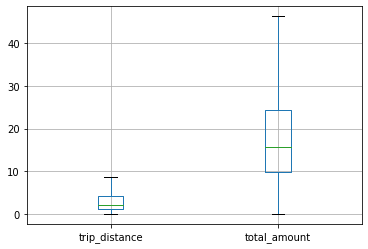

In [14]:
no_outliers.boxplot(showfliers=False)

In [15]:
#sorting shows we have incorrect dates in our data
sort = no_outliers.sort_values(by="lpep_pickup_datetime",ascending=True)
sort.head(10)

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,total_amount
489141,01/01/2009 01:03:17 AM,01/01/2009 01:07:24 AM,1.17,6.3
194754,01/01/2009 01:19:36 AM,01/01/2009 01:28:23 AM,0.76,7.8
1395408,01/01/2009 01:27:08 AM,01/01/2009 01:40:50 AM,2.24,11.8
1229814,01/01/2009 01:32:48 AM,01/01/2009 01:40:22 AM,1.41,8.8
1229815,01/01/2009 01:48:57 AM,01/01/2009 02:06:38 AM,3.23,15.3
89006,01/01/2009 01:53:27 AM,01/01/2009 02:14:57 AM,7.25,24.8
1229816,01/01/2009 02:15:19 AM,01/01/2009 02:15:46 AM,0.05,3.8
1229817,01/01/2009 02:26:45 AM,01/01/2009 02:36:58 AM,1.45,9.8
195826,01/01/2009 02:27:23 AM,01/01/2009 02:30:11 AM,0.46,4.8
90980,01/01/2009 04:53:28 AM,01/01/2009 05:12:02 AM,3.65,14.8


In [16]:
#access AM/PM to assess time peaks
no_outliers = no_outliers.copy()
no_outliers["AM/PM"] = pd.to_datetime(no_outliers["lpep_pickup_datetime"]).dt.strftime(date_format="%p")
no_outliers

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,total_amount,AM/PM
1,01/01/2020 12:45:58 AM,01/01/2020 12:56:39 AM,1.28,24.36,AM
2,01/01/2020 12:41:38 AM,01/01/2020 12:52:49 AM,2.47,15.34,AM
3,01/01/2020 12:52:46 AM,01/01/2020 01:14:21 AM,6.30,25.05,AM
4,01/01/2020 12:19:57 AM,01/01/2020 12:30:56 AM,2.30,11.30,AM
5,01/01/2020 12:52:33 AM,01/01/2020 01:09:54 AM,3.00,14.80,AM
...,...,...,...,...,...
1068750,12/31/2021 11:54:00 PM,01/01/2022 12:19:00 AM,10.81,49.20,PM
1068751,12/31/2021 11:37:00 PM,12/31/2021 11:56:00 PM,4.65,28.39,PM
1068752,12/31/2021 11:59:00 PM,01/01/2022 12:16:00 AM,6.70,33.23,PM
1068753,12/31/2021 11:08:00 PM,12/31/2021 11:29:00 PM,10.38,46.55,PM


In [17]:
#check that all strings are uppercase
upper_case = no_outliers["AM/PM"].str.isupper().sum()
upper_case

2438629

In [18]:
#convert times to datetime objects
cols = ["lpep_pickup_datetime", "lpep_dropoff_datetime"]
no_outliers[cols]=no_outliers[cols].apply(pd.to_datetime, format="%m/%d/%Y %H:%M:%S %p")
no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2438629 entries, 1 to 1068754
Data columns (total 5 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   lpep_pickup_datetime   datetime64[ns]
 1   lpep_dropoff_datetime  datetime64[ns]
 2   trip_distance          float64       
 3   total_amount           float64       
 4   AM/PM                  object        
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 111.6+ MB


In [19]:
#access the months, year,hour
no_outliers["month"] = no_outliers["lpep_dropoff_datetime"].dt.month
no_outliers["year"] = no_outliers["lpep_dropoff_datetime"].dt.year
no_outliers["hour"] = no_outliers["lpep_pickup_datetime"].dt.hour
no_outliers

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,total_amount,AM/PM,month,year,hour
1,2020-01-01 12:45:58,2020-01-01 12:56:39,1.28,24.36,AM,1,2020,12
2,2020-01-01 12:41:38,2020-01-01 12:52:49,2.47,15.34,AM,1,2020,12
3,2020-01-01 12:52:46,2020-01-01 01:14:21,6.30,25.05,AM,1,2020,12
4,2020-01-01 12:19:57,2020-01-01 12:30:56,2.30,11.30,AM,1,2020,12
5,2020-01-01 12:52:33,2020-01-01 01:09:54,3.00,14.80,AM,1,2020,12
...,...,...,...,...,...,...,...,...
1068750,2021-12-31 11:54:00,2022-01-01 12:19:00,10.81,49.20,PM,1,2022,11
1068751,2021-12-31 11:37:00,2021-12-31 11:56:00,4.65,28.39,PM,12,2021,11
1068752,2021-12-31 11:59:00,2022-01-01 12:16:00,6.70,33.23,PM,1,2022,11
1068753,2021-12-31 11:08:00,2021-12-31 11:29:00,10.38,46.55,PM,12,2021,11


In [20]:
#selct year 2020
select_year_twenty = no_outliers[no_outliers.lpep_dropoff_datetime.dt.year == 2020]
select_year_twenty

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,total_amount,AM/PM,month,year,hour
1,2020-01-01 12:45:58,2020-01-01 12:56:39,1.28,24.36,AM,1,2020,12
2,2020-01-01 12:41:38,2020-01-01 12:52:49,2.47,15.34,AM,1,2020,12
3,2020-01-01 12:52:46,2020-01-01 01:14:21,6.30,25.05,AM,1,2020,12
4,2020-01-01 12:19:57,2020-01-01 12:30:56,2.30,11.30,AM,1,2020,12
5,2020-01-01 12:52:33,2020-01-01 01:09:54,3.00,14.80,AM,1,2020,12
...,...,...,...,...,...,...,...,...
1734043,2020-12-31 10:17:00,2020-12-31 10:43:00,7.85,24.88,PM,12,2020,10
1734046,2020-12-31 11:02:00,2020-12-31 11:16:00,7.04,20.63,PM,12,2020,11
1734047,2020-12-31 11:39:00,2020-12-31 11:54:00,2.79,13.47,PM,12,2020,11
1734049,2020-12-31 11:01:00,2020-12-31 11:12:00,4.46,17.39,PM,12,2020,11


In [21]:
#total amount per month for year 2020
plot_year_twenty = select_year_twenty[["total_amount", "month"]].groupby("month").sum()
plot_year_twenty

,total_amount
month,
1,6570593.54
2,5928820.83
3,2898701.90
4,447306.09
5,756651.61
6,919007.31
7,1146817.65
8,1307369.53
9,1485445.12


<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

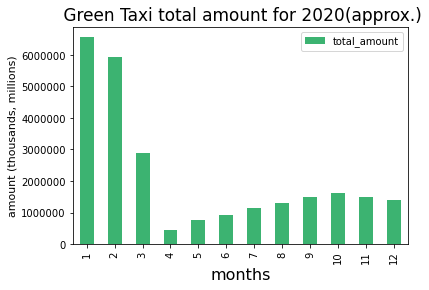

In [22]:
#plot total amount per month for year 2020
def example_plot(plot_year_twenty):
    plot_year_twenty.plot.bar(color="mediumseagreen")
    plt.xlabel("months", fontsize=16)
    plt.ylabel("amount (thousands, millions)", fontsize=11)
    plt.ticklabel_format(axis="y", style="plain")
    plt.title(" Green Taxi total amount for 2020(approx.)", fontsize=17)
    
plt.tight_layout()
plt.figure(figsize=(20,20))
example_plot(plot_year_twenty)

In [23]:
#Jan 2020, which hours were taxis mainly used
jan_year_twenty = no_outliers[(no_outliers["lpep_pickup_datetime"].dt.year== 2020) & (no_outliers["lpep_pickup_datetime"].dt.month == 1)]
plot_jan_year_twenty = jan_year_twenty.pivot_table(values=["lpep_pickup_datetime"], index="hour", columns="AM/PM", aggfunc="count")
plot_jan_year_twenty

lpep_pickup_datetime       
AM/PM                   AM     PM
hour                             
1                     6162  22235
2                     4321  23603
3                     3557  25741
4                     3857  26266
5                     3541  27255
6                     6023  26851
7                    13246  24638
8                    20583  19659
9                    23418  17263
10                   23341  14925
11                   21999  11798
12                    8733  21917

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

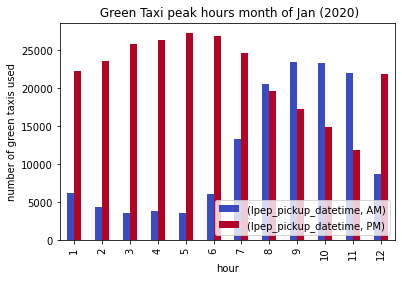

In [24]:
#plot peak times Jan of year 2020
def example_plot(plot_jan_year_twenty, fontsize=10,):
    plot_jan_year_twenty.plot.bar(colormap="coolwarm")
    plt.xlabel("hour", fontsize=fontsize)
    plt.ylabel("number of green taxis used", fontsize=10)
    plt.ticklabel_format(axis="y", style="plain")
    plt.title(" Green Taxi peak hours month of Jan (2020)", fontsize=12)
    plt.legend(loc="lower right")
    
    
plt.tight_layout()
plt.figure(figsize=(20,20))
example_plot(plot_jan_year_twenty, fontsize=10 )

In [25]:
#selct year 2021,
select_yeartwentyone = no_outliers[no_outliers.lpep_dropoff_datetime.dt.year == 2021]
select_yeartwentyone

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,total_amount,AM/PM,month,year,hour
1696044,2020-12-31 08:48:25,2021-01-01 08:35:08,9.46,36.30,AM,1,2021,8
1696688,2020-12-31 02:41:30,2021-01-01 01:49:19,1.45,8.30,PM,1,2021,2
1697085,2020-12-31 04:41:12,2021-01-01 04:00:07,5.60,21.30,PM,1,2021,4
1697305,2020-12-31 11:59:53,2021-01-01 12:03:26,1.34,8.16,PM,1,2021,11
1697322,2020-12-31 11:51:58,2021-01-01 12:11:07,5.50,21.80,PM,1,2021,11
...,...,...,...,...,...,...,...,...
1068748,2021-12-31 11:26:00,2021-12-31 11:40:00,3.12,16.50,PM,12,2021,11
1068749,2021-12-31 11:00:00,2021-12-31 11:19:00,3.73,20.16,PM,12,2021,11
1068751,2021-12-31 11:37:00,2021-12-31 11:56:00,4.65,28.39,PM,12,2021,11
1068753,2021-12-31 11:08:00,2021-12-31 11:29:00,10.38,46.55,PM,12,2021,11


In [26]:
#pivot table of total amount per month for year 2021
plot_yeartwentyone = select_yeartwentyone.pivot_table(values="total_amount", index="month", aggfunc="sum")
plot_yeartwentyone

,total_amount
month,
1,1304405.30
2,1114863.32
3,1465194.53
4,1522312.55
5,1501032.51
6,1457335.27
7,1396578.26
8,1393291.52
9,1613464.86


<Figure size 432x288 with 0 Axes>

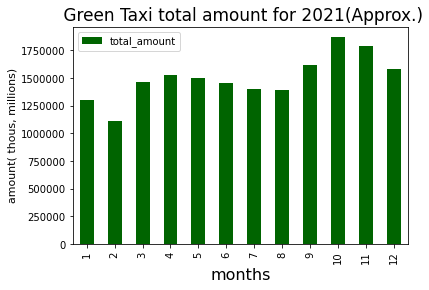

In [27]:
#plot total amount per month for year 2021
def example_plot(plot_yeartwentyone):
    plot_yeartwentyone.plot.bar(color="darkgreen")
    plt.xlabel("months", fontsize=16)
    plt.ylabel("amount( thous, millions)", fontsize=11)
    plt.ticklabel_format(axis="y", style="plain")
    plt.title(" Green Taxi total amount for 2021(Approx.)", fontsize=17)

    
plt.tight_layout()
example_plot(plot_yeartwentyone)

In [28]:
#select years 2020 and 2021
years = no_outliers[(no_outliers["lpep_dropoff_datetime"].dt.year== 2020) | (no_outliers["lpep_dropoff_datetime"].dt.year == 2021)]
years

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,total_amount,AM/PM,month,year,hour
1,2020-01-01 12:45:58,2020-01-01 12:56:39,1.28,24.36,AM,1,2020,12
2,2020-01-01 12:41:38,2020-01-01 12:52:49,2.47,15.34,AM,1,2020,12
3,2020-01-01 12:52:46,2020-01-01 01:14:21,6.30,25.05,AM,1,2020,12
4,2020-01-01 12:19:57,2020-01-01 12:30:56,2.30,11.30,AM,1,2020,12
5,2020-01-01 12:52:33,2020-01-01 01:09:54,3.00,14.80,AM,1,2020,12
...,...,...,...,...,...,...,...,...
1068748,2021-12-31 11:26:00,2021-12-31 11:40:00,3.12,16.50,PM,12,2021,11
1068749,2021-12-31 11:00:00,2021-12-31 11:19:00,3.73,20.16,PM,12,2021,11
1068751,2021-12-31 11:37:00,2021-12-31 11:56:00,4.65,28.39,PM,12,2021,11
1068753,2021-12-31 11:08:00,2021-12-31 11:29:00,10.38,46.55,PM,12,2021,11


In [29]:
#pivot table of total amount per month for year 2020 and 2021
plot_years = years.pivot_table(values="total_amount", index="month", columns="year",aggfunc="sum")
plot_years

year,2020,2021
month,,
1,6570593.54,1304405.30
2,5928820.83,1114863.32
3,2898701.90,1465194.53
4,447306.09,1522312.55
5,756651.61,1501032.51
6,919007.31,1457335.27
7,1146817.65,1396578.26
8,1307369.53,1393291.52
9,1485445.12,1613464.86


<Figure size 432x288 with 0 Axes>

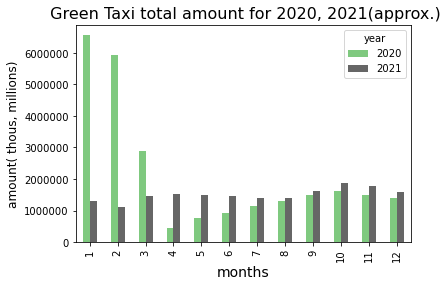

In [30]:
#plot total amount per month for year 2020 and 2021
def example_plot(plot_years):
    plot_years.plot.bar(colormap="Accent")
    plt.xlabel("months", fontsize=14)
    plt.ylabel("amount( thous, millions)", fontsize=12)
    plt.ticklabel_format(axis="y", style="plain")
    plt.title(" Green Taxi total amount for 2020, 2021(approx.)", fontsize=16)

    
plt.tight_layout()
example_plot(plot_years)

In [31]:
#pivot table of total trip distance per month for years 2020 and 2021
plot_trip_distance = years.pivot_table(values="trip_distance", index="month", columns="year",aggfunc="sum")
plot_trip_distance

year,2020,2021
month,,
1,1159458.12,215541.66
2,1007820.20,183234.73
3,564264.09,240884.13
4,93813.93,250001.12
5,168467.40,248158.85
6,171004.04,244269.79
7,196452.69,239402.24
8,222259.86,239996.35
9,246128.84,278098.50


<Figure size 432x288 with 0 Axes>

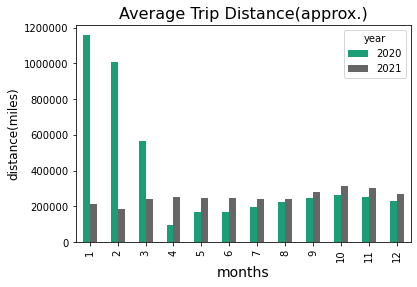

In [32]:
#plot total trip distance per month for year 2020 and 2021
def example_plot(plot_trip_distance):
    plot_trip_distance.plot.bar(colormap="Dark2")
    plt.xlabel("months", fontsize=14)
    plt.ylabel("distance(miles)", fontsize=12)
    plt.ticklabel_format(axis="y", style="plain")
    plt.title("Average Trip Distance(approx.)", fontsize= 16)

    
plt.tight_layout()
example_plot(plot_trip_distance)

In [33]:
#table shows total amount and trip distance per year
plot_total_years = years.pivot_table(values=["total_amount", "trip_distance"], index="year",aggfunc="sum")
plot_total_years

,total_amount,trip_distance
year,,
2020,25983695.25,4576662.61
2021,18008265.83,3027667.14


In [34]:
#save cleaned data
no_outliers.to_csv("cleaned.csv", index=False)